<div style="border: 2px solid black; padding: 10px; background-color: #f7f7f7; text-align: center;">
    <h1 style="color: Navy; text-decoration: underline;">TP3: Machine Learning II</h1>
</div>


#### Exercice 1 : Découverte de l'environnement

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from env_traffic import TrafficEnvironment 

env = TrafficEnvironment()
state = env.reset()

for _ in range(10):
    action = 0
    next_state, reward = env.step(action)
    print(f"Etat : {next_state}, Recompense : {reward}")

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [2 5 3 5] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [3 6 1 2]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [3 8 2 1]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [3 9 0 0]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 4:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [ 3 11  2  1]
  🎯 Reward (Cars Passed): 0
----------------------------------------
Step 5:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [0 8 2 3]
  🎯 Reward (Cars Passed): 5
----------------

#### Exercice 2: Implémentation de Q-learning

In [18]:
import numpy as np
import random

def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    q_table = np.zeros((10, 10, 10, 10, 2))
    rewards = []

    for ep in range(episodes):
        raw_state = env.reset()
        state = tuple(np.clip(raw_state, 0, 9)) 
        total_reward = 0

        for _ in range(100):
            if random.uniform(0, 1) < epsilon:
                action = random.choice([0, 1])
            else:
                action = np.argmax(q_table[state])

            next_state_raw, reward = env.step(action)
            next_state = tuple(np.clip(next_state_raw, 0, 9))  

            best_next = np.max(q_table[next_state])
            q_table[state][action] += alpha * (reward + gamma * best_next - q_table[state][action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)
        epsilon *= decay

    return q_table, rewards


#### Exercice 3: Implémentation de SARSA

In [19]:
def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    q_table = np.zeros((10, 10, 10, 10, 2))
    rewards = []

    for ep in range(episodes):
        raw_state = env.reset()
        state = tuple(np.clip(raw_state, 0, 9))  
        total_reward = 0

        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1])
        else:
            action = np.argmax(q_table[state])

        for _ in range(100):
            next_state_raw, reward = env.step(action)
            next_state = tuple(np.clip(next_state_raw, 0, 9)) 

            if random.uniform(0, 1) < epsilon:
                next_action = random.choice([0, 1])
            else:
                next_action = np.argmax(q_table[next_state])

            q_table[state][action] += alpha * (
                reward + gamma * q_table[next_state][next_action] - q_table[state][action]
            )

            state = next_state
            action = next_action
            total_reward += reward

        rewards.append(total_reward)
        epsilon *= decay

    return q_table, rewards


#### Exercice 4 : Analyse et visualisation des résultats

In [20]:
import matplotlib.pyplot as plt

env = TrafficEnvironment()
q_table_q, rewards_q = train_q_learning(env)
q_table_sarsa, rewards_sarsa = train_sarsa(env)


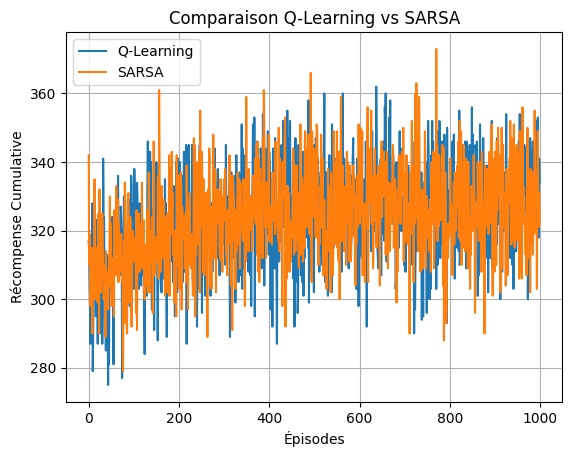

In [21]:
import matplotlib.pyplot as plt

plt.plot(rewards_q, label="Q-Learning")
plt.plot(rewards_sarsa, label="SARSA")
plt.xlabel("Épisodes")
plt.ylabel("Récompense Cumulative")
plt.title("Comparaison Q-Learning vs SARSA")
plt.legend()
plt.grid()
plt.show()
